# This notebook explores employing our homebrew Neural Network for MNIST Image Classification

In [1]:
#making imports
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from Network import Network

In [2]:
# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshaping & normalizing x_train data
x_train = x_train.reshape(x_train.shape[0], 1, 28 * 28)
x_train = x_train.astype('float32')
x_train /= 255

# hot encoding y_train vector
y_train = np_utils.to_categorical(y_train)

# reshaping & normalizing y_train data
x_test = x_test.reshape(x_test.shape[0], 1, 28 * 28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

# taking 4000 sub-samples:
x_train_trunc = x_train[0:4000]
y_train_trunc = y_train[0:4000]

# testing on 50 samples
x_test_trunc = x_test[0:400]
y_test_trunc = y_test[0:400]

# reshaping data to conform to our model 2d np array standards
x_train_trunc = np.reshape(x_train_trunc, (x_train_trunc.shape[0], x_train_trunc.shape[2]))
# y_train_trunc = np.reshape(y_train_trunc, (y_train_trunc.shape[0], y_train_trunc.shape[2]))
x_test_trunc = np.reshape(x_test_trunc, (x_test_trunc.shape[0], x_test_trunc.shape[2]))
# y_test_trunc =  np.reshape(y_test_trunc, (y_test_trunc.shape[0], y_test_trunc.shape[2]))

Epoch #: 1 | Most Recent Error" 0.012771507765646341
Epoch #: 2 | Most Recent Error" 0.08208334203460987
Epoch #: 3 | Most Recent Error" 0.6760252781987762
Epoch #: 4 | Most Recent Error" 0.011150401349077469
Epoch #: 5 | Most Recent Error" 0.01769825084585494
Epoch #: 6 | Most Recent Error" 0.00011569953313585944
Epoch #: 7 | Most Recent Error" 0.06733799806539459
Epoch #: 8 | Most Recent Error" 6.839196910688557e-06
Epoch #: 9 | Most Recent Error" 2.874376198046813e-05
Epoch #: 10 | Most Recent Error" 0.00017393590438881756
Epoch #: 11 | Most Recent Error" 1.0996152859046049
Epoch #: 12 | Most Recent Error" 6.791431786628515e-06
Epoch #: 13 | Most Recent Error" 0.00018608831223529518
Epoch #: 14 | Most Recent Error" 0.15201010109023685
Epoch #: 15 | Most Recent Error" 2.864091135830237e-05
Epoch #: 16 | Most Recent Error" 0.00021273691286902954
Epoch #: 17 | Most Recent Error" 0.0007510606213555763
Epoch #: 18 | Most Recent Error" 5.707689124161327e-05
Epoch #: 19 | Most Recent Error

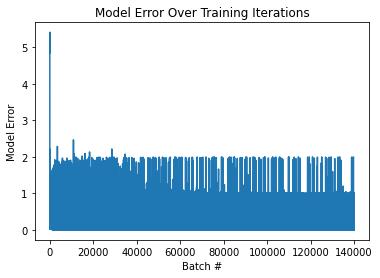

In [3]:
# creating our model
model = Network('mse', x_train_trunc, y_train_trunc, x_test_trunc, y_test_trunc, x_features=784, epoch_num=35,
                layer_num=3, layer_depths=[100, 50, 10], learn_rate=0.1)

# adding our tangent hyperbolic hidden layers
model.add_Layer('relu', 'initial_hidden')
model.add_Layer('relu', 'hidden')

# adding output layer
model.add_Layer('sigmoid', 'output')

# training model
model.train()

# plotting model error while training
model.plot_train_error()

# printing model predictions for some test samples
model.test_multinomial_classification()